In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd                # For handling data
import matplotlib.pyplot as plt    # For plotting graphs
import seaborn as sns              # For nicer-looking plots

In [ ]:
!ls /content/drive/MyDrive/Datathon/

 2019_vtrans_prioritized_mid-term_needs_0.csv
 2019_VTrans_Prioritized_Mid-term_Needs.csv
'GTFS Stops - Dec 2024.csv'
 transit_data_october_2021_-4168999320477471535.xlsx
'Transportation Safety_Fatalities_VA 2010 - 2023.csv'
 transportation-safety_fatalities_va-2010-2023.xlsx
'VDOT 6 Year Improvement Plan - Project list.csv'
 vdot-6-year-improvement-plan-project-list.xlsx
'Vehicle Data - Virginia Department of Motor Vehicles.csv'
'vehicles-involved-in-fatal-crashes_1994-_2022_virginia 222.xlsx'


In [ ]:
# Step 1: Load the correct file
file_path = "/content/drive/MyDrive/Datathon/vehicles-involved-in-fatal-crashes_1994-_2022_virginia 222.xlsx"
df = pd.read_excel(file_path)

# Step 2: Preview the shape and columns
print("Original shape:", df.shape)
print("Original columns:")
print(df.columns)

Original shape: (30, 5)
Original columns:
Index(['Unnamed: 0', 'Passenger Cars', 'Light Trucks', 'Large Trucks',
       'Motorcycles'],
      dtype='object')


In [ ]:
# Re-read the file without a header
df_raw = pd.read_excel(file_path, header=None)

# Display first 5–10 rows to locate the correct header
df_raw.head(10)


,0,1,2,3,4
0,NaN,Passenger Cars,Light Trucks,Large Trucks,Motorcycles
1,Year,Number of Passenger Cars,Number of Light Trucks,Number of Large Trucks,Number of Motorcycles
2,1994,673,344,126,33
3,1995,690,374,93,33
4,1996,705,348,118,35
5,1997,748,428,120,41
6,1998,632,419,115,39
7,1999,601,376,107,40
8,2000,690,429,112,43
9,2001,699,465,115,45


In [ ]:
# Re-read the Excel file using the correct header row
df = pd.read_excel(file_path, header=1)

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# View structure
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (29, 5)
Columns: ['Year', 'Number of Passenger Cars', 'Number of Light Trucks', 'Number of Large Trucks', 'Number of Motorcycles']


,Year,Number of Passenger Cars,Number of Light Trucks,Number of Large Trucks,Number of Motorcycles
0,1994,673,344,126,33
1,1995,690,374,93,33
2,1996,705,348,118,35
3,1997,748,428,120,41
4,1998,632,419,115,39


##trends over time

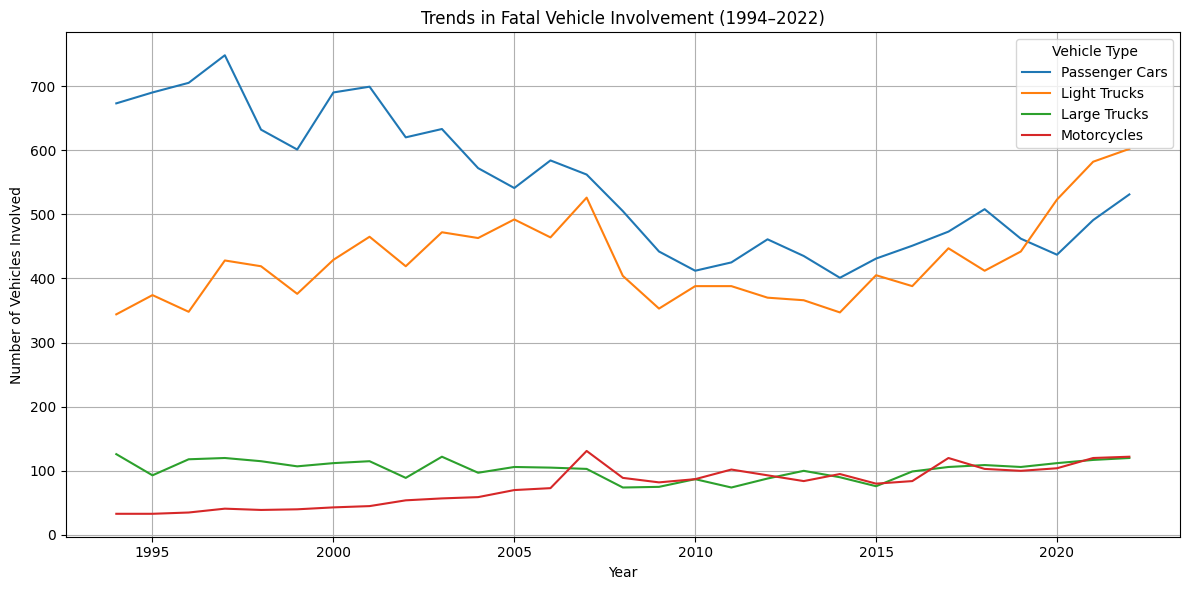

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# Plot each vehicle type
sns.lineplot(data=df, x="Year", y="Number of Passenger Cars", label="Passenger Cars")
sns.lineplot(data=df, x="Year", y="Number of Light Trucks", label="Light Trucks")
sns.lineplot(data=df, x="Year", y="Number of Large Trucks", label="Large Trucks")
sns.lineplot(data=df, x="Year", y="Number of Motorcycles", label="Motorcycles")

# Chart styling
plt.title("Trends in Fatal Vehicle Involvement (1994–2022)")
plt.xlabel("Year")
plt.ylabel("Number of Vehicles Involved")
plt.legend(title="Vehicle Type")
plt.grid(True)
plt.tight_layout()
plt.show()


#% Change Over Time (Growth/Decline)

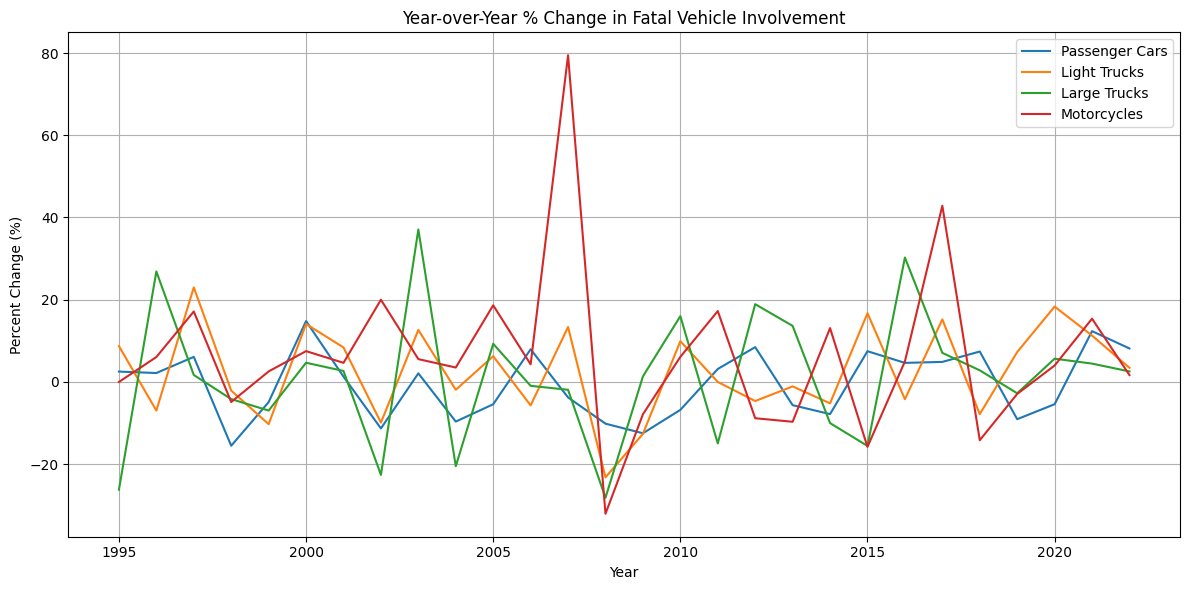

In [ ]:
df_pct = df.copy()
df_pct.set_index("Year", inplace=True)

# Calculate percent change from year to year
df_pct_change = df_pct.pct_change() * 100

# Plot it
plt.figure(figsize=(12,6))
for col in df_pct_change.columns:
    sns.lineplot(data=df_pct_change, x=df_pct_change.index, y=col, label=col.replace("Number of ", ""))
plt.title("Year-over-Year % Change in Fatal Vehicle Involvement")
plt.ylabel("Percent Change (%)")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


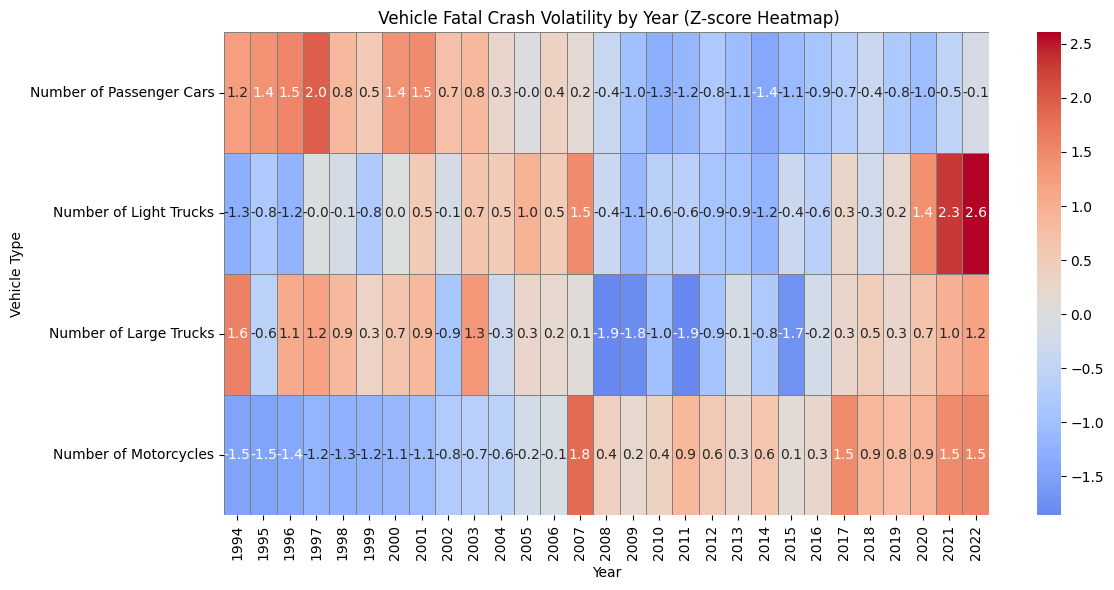

In [ ]:
from scipy.stats import zscore

# Calculate z-scores to show deviation from mean for each vehicle type
df_z = df.copy()
vehicle_cols = df.columns[1:]
df_z[vehicle_cols] = df_z[vehicle_cols].apply(zscore)

# Set 'Year' as index for the heatmap
df_z.set_index("Year", inplace=True)

# Create the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_z.T, cmap="coolwarm", center=0, linewidths=0.5, linecolor='gray', annot=True, fmt=".1f")
plt.title(" Vehicle Fatal Crash Volatility by Year (Z-score Heatmap)")
plt.xlabel("Year")
plt.ylabel("Vehicle Type")
plt.tight_layout()
plt.show()
